In [90]:
import pandas as pd
import xarray as xr
import requests
import matplotlib.pyplot as plt

In [91]:
from RRFS import rrfs
r = rrfs.rrfs()

#Inputs storm_report row and the forecast hour
#Outputs xarray dataset with model forecast
def fetch_rrfs_forecast(storm_report, forecast_hour):
    st_month = storm_report["datetime"].month
    st_year = storm_report["datetime"].year
    st_day = storm_report["datetime"].day
    st_hour = storm_report["datetime"].hour
    date_time= storm_report['datetime'].strftime("%Y-%m-%d")
    initialization_date = get_initialization_date(storm_report, forecast_hour)
    
    return r.fetch_model_output(initialization_date, forecast_hour)

#Helper function
#Gets initialization hour for given storm report and its forecast hour
def get_initialization_date(storm_report, forecast_hour):
    # hour = storm_report["datetime"].hour
    # f_hour = pd.Timestamp(0, 0,0,forecast_hour)
    initialization_date = storm_report["datetime"] - pd.Timedelta(hours=6)
    # print(initialization_date)
    # init_hour = (hour - forecast_hour)%24self.get_path(date_time_str, init_hour_str, file_name)
    # initialization_hour = f'0{init_hour}' if init_hour < 10 else f'{init_hour}'
    return initialization_date

## Section 1: Storm Reports ##

In [92]:
#Generates link to csv download of wind report on given date. Date format "yymmdd"
def generate_link(date):
    return f'https://www.spc.noaa.gov/climo/reports/{date}_rpts_wind.csv'

In [93]:
#Gets wind report on given date as a pandas dataframe
def get_wind_report(datetime):
    date = datetime.strftime("%y%m%d")
    df = request_wind_report_df(date)    
    df = add_datetime(df, datetime)
    return df

def request_wind_report_df(date):
    #Actual request
    link = generate_link(datetime)
    data = requests.get(link)
    #Turns csv string into dataFrame
    csv_string = data.text
    data = [row.split(',') for row in csv_string.split('\n')]
    data.pop(-1)
    columns = data.pop(0)
    data.pop(0)
    #Returns dataframe 
    df = pd.DataFrame(data, columns=columns)
    df["Lat"] = df["Lat"].astype("float")
    df["Lon"] = df["Lon"].astype("float")
    return df

def add_datetime(df, datetime):
    #Hardcoded
    day = datetime.day 
    time = df["Time"]
    datetime = pd.Timestamp(year=2023, month=)
    f'2023-05-{day}'
    #Adds date time with correct string format
    df["datetime"] = [pd.Timestamp(f'{datetime} {t}') for t in time]
    df['datetime'] = pd.to_datetime(df["datetime"])
    #Removes Time column
    df.drop(columns=["Time"], inplace=True)
    return df 

SyntaxError: invalid syntax (4067298169.py, line 28)

In [94]:
# get_wind_report("230531")
request_wind_report_df("230601")

,Time,Speed,Location,County,State,Lat,Lon,Comments
0,2015,UNK,3 SW Aberdeen,Brown,SD,45.44,-98.52,Wind tipped a trailer on US HWY 281... 2 miles...
1,2050,UNK,2 ESE Villa Park,DuPage,IL,41.88,-87.95,Several branches snapped off trees... up to 6 ...
2,2058,UNK,1 SW Merrillville,Lake,IN,41.46,-87.35,Trained spotter reports downed branches up to ...
3,2124,UNK,Ralston,Douglas,NE,41.20,-96.04,Delayed report. Social media photo of large tr...
4,2130,60,2 NW Ralston,Douglas,NE,41.23,-96.06,(OAX)
5,2145,UNK,4 NNE Horace,Cass,ND,46.81,-96.86,52nd street between I-29 and University... 6-1...
6,2158,UNK,Moore,Cleveland,OK,35.34,-97.48,Delayed report. Picture of uprooted tree... ap...
7,2158,UNK,1 NNW Moore,Cleveland,OK,35.35,-97.49,Small tree limbs broken. Time estimated by rad...
8,2212,UNK,Anson,Jones,TX,32.75,-99.90,Report from mPING: 3-inch tree limbs broken; P...
9,2218,UNK,Anson,Jones,TX,32.75,-99.90,Fences blown over and a collapsed carport in d...


In [6]:
#TODO: Brain storm how to plot close times together

In [43]:
#Returns pandas dataframe with wind reports for month of may
def get_weather_reports():    
    i = 0
    start = pd.Timestamp(year=2023, month=5, day=1)
    end = pd.Timestamp(year=2023, month=6, day=8)
    for date in generate_days(start, end):
        df = get_wind_report(date)
        if i == 0:
            big_df = df
            i += 1
        else :
            big_df = pd.concat([big_df, df])
    big_df.reset_index(inplace=True)
    return big_df

#Generates dates in format "yymmdd"
def generate_days(start_date, end_date):
    
    days = pd.period_range(start=start_date, end=end_date)
    days = [day.strftime("%y%m%d") for day in days]
    return days


In [81]:
def spatial_filter(df, lat, lon, distance):
    let_filtered_df = latitude_filter(df, lat, distance)
    filtered_df = longitude_filter(df, lon, distance)
    return filtered_df

def latitude_filter(df, lat, distance):
    lat_filtered = df[df["Lat"] <= lat + distance]
    lat_filtered = lat_filtered[lat_filtered["Lat"] >= lat - distance]
    return lat_filtered

def longitude_filter(df, lon, distance):
    lon_filtered = df[df["Lon"] <= lon + distance]
    lon_filtered = lon_filtered[lon_filtered["Lon"] >= lon - distance]
    return lon_filtered
    
def temporal_filter(df, hours, date_time):
    print(date_time)
    print(pd.Timedelta(hours=hours))
    print(date_time - pd.Timedelta(hours=hours))
    print(df["datetime"] == (date_time - pd.Timedelta(hours=hours)))
    filtered_df = df[df["datetime"] >= (date_time - pd.Timedelta(hours=hours))]
    time_filtered_events = filtered_df[filtered_df["datetime"] <= (date_time + pd.Timedelta(hours=hours))]
    return time_filtered_events

temporal_filter(reports, 3, date_time)

1827   2023-05-07 02:19:00
Name: datetime, dtype: datetime64[ns]
0 days 03:00:00
1827   2023-05-06 23:19:00
Name: datetime, dtype: datetime64[ns]


ValueError: Can only compare identically-labeled Series objects

In [60]:
reports = get_weather_reports()
reports 


,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
0,0,UNK,8 NNE BUCHANAN,HARNEY,OR,43.74,-118.57,A COUPLE OF TREES KNOCKED DOWN ON PINE CREEK R...,2023-05-01 01:00:00
1,1,UNK,DREWSEY,HARNEY,OR,43.81,-118.38,A TRAINED SPOTTER NEAR DREWSEY... OR REPORTED ...,2023-05-01 01:08:00
2,2,61,14 ENE VAN,HARNEY,OR,44.04,-118.42,MESONET STATION ATFO3 ANTELOPE. (BOI),2023-05-01 01:28:00
3,0,58,2 NNE SEMINOLE,GAINES,TX,32.75,-102.64,SEMINOLE MESONET MEASURED A WIND GUST OF 58 MP...,2023-05-02 00:19:00
4,1,61,1 WSW SEAGRAVES,GAINES,TX,32.94,-102.57,MESONET STATION 15 SEAGRAVES 1SW. (MAF),2023-05-02 00:49:00
...,...,...,...,...,...,...,...,...,...
1917,75,UNK,1 N Ellisforde,Okanogan,WA,48.81,-119.40,Downed wires and power outages in the Ellisfor...,2023-05-08 03:04:00
1918,76,UNK,Oroville,Okanogan,WA,48.94,-119.44,Carport roof blown off and downed tree limbs a...,2023-05-08 03:21:00
1919,77,UNK,1 N Carlton,Okanogan,WA,48.25,-120.11,Two-foot diameter tree downed with minor prope...,2023-05-08 03:25:00
1920,78,UNK,4 SE Twisp,Okanogan,WA,48.33,-120.06,Downed trees and power lines on Highway 153 so...,2023-05-08 03:29:00


In [62]:
report = reports[reports['Lat'] == 32.32]
date_time = report['datetime']
report

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
1827,61,67,2 E Andrews,Andrews,TX,32.32,-102.52,Mesonet station 48 2E AndrewsW. (MAF),2023-05-07 02:19:00


In [82]:
spatial_filter(reports, report["Lat"],report["Lon"], 1)

ValueError: Can only compare identically-labeled Series objects

In [85]:
#Filtering data temporally
#TODO: Filter spatially 
IV = report_data.loc[800]
IV
hours = 3
distance = 0.5
print(report_data["datetime"] >= (IV["datetime"] - pd.Timedelta(hours=hours)))
a = report_data[report_data["datetime"] >= (IV["datetime"] - pd.Timedelta(hours=hours))]
time_filtered_events = a[a["datetime"] <= (IV["datetime"] + pd.Timedelta(hours=hours))]

lat_filtered = time_filtered_events[time_filtered_events["Lat"] <= IV["Lat"] + distance]
lat_filtered = lat_filtered[lat_filtered["Lat"] >= IV["Lat"] - distance]
print(lat_filtered)
# print(lat_filtered[lat_filtered["Lat"] >= IV["Lat"] - 1])
lon_filtered = lat_filtered[lat_filtered["Lon"] <= IV["Lon"] + distance]
# print(lon_filtered)
lon_filtered = lon_filtered[lat_filtered["Lon"] >= IV["Lon"] - distance]
# print(lon_filtered)
# space_filtered = time_filtered_events["Lat"] <= abs(IV["Lat"] - 1)]
# lon_filtered["Lat"]

0      False
1      False
2      False
3      False
4      False
       ...  
973     True
974     True
975     True
976     True
977     True
Name: datetime, Length: 978, dtype: bool
     index Speed                 Location      County State    Lat     Lon  \
795      7   UNK            5 E TUCUMCARI        QUAY    NM  35.17 -103.65   
796      8    70            6 N WHEATLAND        QUAY    NM  35.00 -103.34   
797      9    59             5 NW GLENRIO        QUAY    NM  35.22 -103.12   
798     10    59                  GLENRIO        QUAY    NM  35.18 -103.04   
799     11   UNK                    GRADY       CURRY    NM  34.82 -103.32   
800     12    92                    GRADY       CURRY    NM  34.82 -103.31   
801     13    84      11 NW PLEASANT HILL       CURRY    NM  34.64 -103.21   
802     14    60  4 SE CANNON AIR FORCE B       CURRY    NM  34.35 -103.26   
803     15    60           11 WNW BOOTLEG  DEAF SMITH    TX  34.89 -102.99   
804     16   UNK             1 NNW C

/tmp/ipykernel_104907/3965108519.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lon_filtered = lon_filtered[lat_filtered["Lon"] >= IV["Lon"] - distance]


In [10]:
lon_filtered

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
795,7,UNK,5 E TUCUMCARI,QUAY,NM,35.17,-103.65,MULTIPLE SEMI ROLLOVERS ALONG I-40. LOCATION E...,2023-05-24 00:00:00
796,8,70,6 N WHEATLAND,QUAY,NM,35.00,-103.34,(ABQ),2023-05-24 00:18:00
797,9,59,5 NW GLENRIO,QUAY,NM,35.22,-103.12,(ABQ),2023-05-24 00:30:00
798,10,59,GLENRIO,QUAY,NM,35.18,-103.04,(ABQ),2023-05-24 01:00:00
799,11,UNK,GRADY,CURRY,NM,34.82,-103.32,NORTHSIDE WINDOWS OF BAPTIST CHURCH KNOCKED OU...,2023-05-24 01:10:00
800,12,92,GRADY,CURRY,NM,34.82,-103.31,TORUS MOBILE MESONET CLOCKED 92.4 MPH FROM RFD...,2023-05-24 01:13:00
801,13,84,11 NW PLEASANT HILL,CURRY,NM,34.64,-103.21,MEASURED WITH HANDHELD. (ABQ),2023-05-24 01:23:00
802,14,60,4 SE CANNON AIR FORCE B,CURRY,NM,34.35,-103.26,(ABQ),2023-05-24 01:47:00
803,15,60,11 WNW BOOTLEG,DEAF SMITH,TX,34.89,-102.99,OBSERVED BY MESONET. (AMA),2023-05-24 02:01:00
804,16,UNK,1 NNW CLOVIS,CURRY,NM,34.43,-103.21,EMERGENCY MANAGER REPORTED ROOF DAMAGE TO TOWN...,2023-05-24 02:20:00


In [11]:
a = pd.Timestamp(year=2000, month=5, day=5, hour=5)
b = pd.Timestamp(year=2000, month=5, day=5, hour=6)
a + pd.Timedelta(hours=1) == b
# interesting_events.loc[800]["datetime"] + pd.Timedelta(hours=6)

True

In [12]:
report_data["Lat"]
report_data["Lon"]

0      -94.29
1      -94.25
2     -117.03
3      -94.18
4      -93.87
        ...  
973   -102.35
974   -102.08
975   -101.93
976   -101.61
977   -101.62
Name: Lon, Length: 978, dtype: float64

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


def plot_interesting_events(events):

    figure = plt.figure()
    
    ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    s = 3
    ax.set_extent(
        [IV["Lon"] - s, IV["Lon"] + s, IV["Lat"] - s, IV["Lat"] + s],
        crs=ccrs.PlateCarree()
    )
    plt.scatter(
        x = events["Lon"],
        y = events["Lat"],
        color="red",
        s=2,
        alpha=1,
        transform=ccrs.PlateCarree()
    )
    
    ##Add quiver
    
    ##Add 
    
    plt.show()

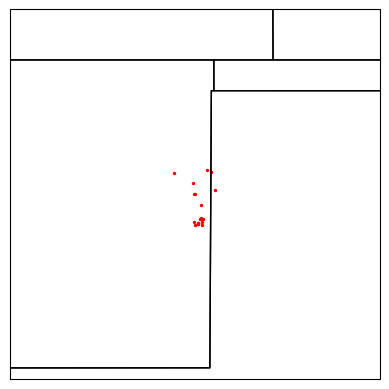

In [14]:
plot_interesting_events(lon_filtered)

In [15]:
fetch_rrfs_forecast(IV, 3)

File name rrfs.t19z.natlev.f003.conus_3km.grib2


/home/andres/anaconda3/envs/rrfs_env/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                          (ygrid_0: 1059, xgrid_0: 1799,
                                      lv_ISBL0: 5, lv_AMSL1: 10, lv_HYBL2: 65,
                                      lv_SPDL3: 6, lv_ISBL4: 4, lv_HTGL5: 2,
                                      lv_SIGL6: 22, lv_SPDL7: 3, lv_HTGL8: 2,
                                      lv_DBLL9: 9, lv_HTGL10: 2, lv_HTGL11: 2,
                                      lv_HTGL12: 2)
Coordinates:
  * lv_HTGL12                        (lv_HTGL12) float32 1.0 2.0
  * lv_SIGL6                         (lv_SIGL6) float32 0.053 0.158 ... 0.9975
  * lv_HTGL5                         (lv_HTGL5) float32 2.0 10.0
  * lv_ISBL4                         (lv_ISBL4) float32 2.5e+04 ... 8.5e+04
  * lv_HYBL2                         (lv_HYBL2) float32 1.0 2.0 ... 64.0 65.0
  * lv_AMSL1                         (lv_AMSL1) float32 305.0 ... 4.572e+03
  * lv_ISBL0                         (lv_ISBL0) float32 2.5e+04 ... 9.5e+04
    gridlat_0                        (ygrid_0, xgrid_0) float32 ...
    gridlon_0                        (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0, lv_SPDL3, lv_SPDL7, lv_HTGL8,
                                lv_DBLL9, lv_HTGL10, lv_HTGL11
Data variables: (12/217)
    TMP_P0_L1_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L3_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L7_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0                 (lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L102_GLC0                 (lv_AMSL1, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0                 (ygrid_0, xgrid_0) float32 ...
    ...                               ...
    lv_HTGL8_l0                      (lv_HTGL8) float32 ...
    lv_SPDL7_l1                      (lv_SPDL7) float32 ...
    lv_SPDL7_l0                      (lv_SPDL7) float32 ...
    lv_SPDL3_l1                      (lv_SPDL3) float32 ...
    lv_SPDL3_l0                      (lv_SPDL3) float32 ...
    gridrot_0                        (ygrid_0, xgrid_0) float32 ...

## TODO: Map the "interesting" weather reports ##

In [11]:
interesting_event_1 = report_data[report_data["Lat"] == 33.62]
interesting_event_1

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
785,28,68,3 NW SEYMOUR,BAYLOR,TX,33.62,-99.3,WEST TEXAS MESONET. (OUN),2023-05-23 04:10:00
786,29,76,3 NW SEYMOUR,BAYLOR,TX,33.62,-99.3,WEST TEXAS MESONET. CORRECTED FOR EARLIER TIME...,2023-05-23 04:15:00
787,30,76,3 NW SEYMOUR,BAYLOR,TX,33.62,-99.3,WEST TEXAS MESONET. (OUN),2023-05-23 04:20:00


In [71]:
interesting_events_2 = report_data[report_data["Lat"] == 33.17]
interesting_events_2

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
87,17,UNK,SYLACAUGA,TALLADEGA,AL,33.17,-86.25,MULTIPLE REPORTS OF TREES AND POWER LINES DOWN...,2023-05-09 18:55:00
337,48,65,1 NW HASKELL,HASKELL,TX,33.17,-99.74,WEST TEXAS MESONET IN HASKELL REPORTED A MAX G...,2023-05-12 23:44:00
692,1,UNK,7 N CADDO MILLS,HUNT,TX,33.17,-96.21,POWERLINES AND POWER POLES SNAPPED; SOME MATUR...,2023-05-19 21:27:00
755,11,80,3 NE ASPERMONT,STONEWALL,TX,33.17,-100.20,WEST TEXAS MESONET. SEVERE WIND GUSTS CONTINUE...,2023-05-22 01:24:00


In [72]:
interesting_event_2 = interesting_events_2.loc[755]
ds = fetch_rrfs_forecast(interesting_event_2, 6)
ds

File succesfully downloaded


<xarray.Dataset>
Dimensions:                          (ygrid_0: 1059, xgrid_0: 1799,
                                      lv_ISBL0: 5, lv_AMSL1: 10, lv_HYBL2: 65,
                                      lv_SPDL3: 6, lv_ISBL4: 4, lv_HTGL5: 2,
                                      lv_SIGL6: 22, lv_SPDL7: 3, lv_HTGL8: 2,
                                      lv_DBLL9: 9, lv_HTGL10: 2, lv_HTGL11: 2,
                                      lv_HTGL12: 2)
Coordinates:
  * lv_HTGL12                        (lv_HTGL12) float32 1.0 2.0
  * lv_SIGL6                         (lv_SIGL6) float32 0.053 0.158 ... 0.9975
  * lv_HTGL5                         (lv_HTGL5) float32 2.0 10.0
  * lv_ISBL4                         (lv_ISBL4) float32 2.5e+04 ... 8.5e+04
  * lv_HYBL2                         (lv_HYBL2) float32 1.0 2.0 ... 64.0 65.0
  * lv_AMSL1                         (lv_AMSL1) float32 305.0 ... 4.572e+03
  * lv_ISBL0                         (lv_ISBL0) float32 2.5e+04 ... 9.5e+04
    gridlat_0                        (ygrid_0, xgrid_0) float32 ...
    gridlon_0                        (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0, lv_SPDL3, lv_SPDL7, lv_HTGL8,
                                lv_DBLL9, lv_HTGL10, lv_HTGL11
Data variables: (12/217)
    TMP_P0_L1_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L3_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L7_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0                 (lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L102_GLC0                 (lv_AMSL1, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0                 (ygrid_0, xgrid_0) float32 ...
    ...                               ...
    lv_HTGL8_l0                      (lv_HTGL8) float32 ...
    lv_SPDL7_l1                      (lv_SPDL7) float32 ...
    lv_SPDL7_l0                      (lv_SPDL7) float32 ...
    lv_SPDL3_l1                      (lv_SPDL3) float32 ...
    lv_SPDL3_l0                      (lv_SPDL3) float32 ...
    gridrot_0                        (ygrid_0, xgrid_0) float32 ...

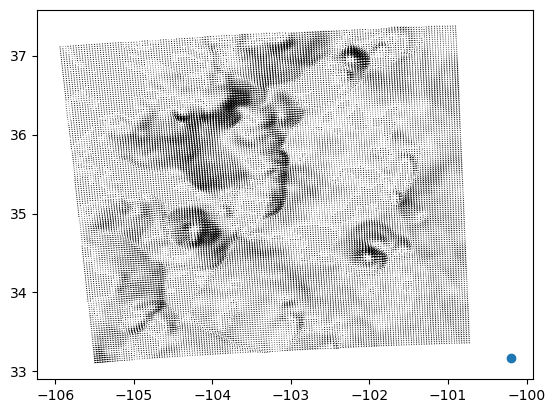

In [76]:
plot_wind_field(ds, interesting_event_2)

In [77]:
interesting_event_3 = report_data[report_data["Lat"] == 36.77]
interesting_event_3

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
722,2,93,10 NW MERCURY,NYE,NV,36.77,-116.1,AT 1700 PDT... THE ARL SORD SENSOR LOCATED AT ...,2023-05-20


In [78]:
i_event_4 = report_data[report_data["Lat"] == 32.99]
i_event_4

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
367,10,UNK,2 ESE HUGHES SPRINGS,CASS,TX,32.99,-94.60,TREES DOWN EAST OF HUGHES SPRINGS. (SHV),2023-05-13 00:50:00
824,36,59,6 WNW DENVER CITY,YOAKUM,TX,32.99,-102.94,WEST TEXAS MESONET. (LUB),2023-05-24 08:11:00
868,0,79,6 WNW DENVER CITY,YOAKUM,TX,32.99,-102.94,WEST TEXAS MESONET PEAK GUST. INITIAL SEVERE G...,2023-05-28 23:58:00


In [79]:
test_st = i_event_4.loc[367]

## Section 2: RRFS Model Data ##

In [35]:
ds = fetch_rrfs_forecast(IV, 6)
ds.isel(ygrid_0=range(379,417), xgrid_0=range(706,738))

<xarray.Dataset>
Dimensions:                          (ygrid_0: 38, xgrid_0: 32, lv_ISBL0: 5,
                                      lv_AMSL1: 10, lv_HYBL2: 65, lv_SPDL3: 6,
                                      lv_ISBL4: 4, lv_HTGL5: 2, lv_SIGL6: 22,
                                      lv_SPDL7: 3, lv_HTGL8: 2, lv_DBLL9: 9,
                                      lv_HTGL10: 2, lv_HTGL11: 2, lv_HTGL12: 2)
Coordinates:
  * lv_HTGL12                        (lv_HTGL12) float32 1.0 2.0
  * lv_SIGL6                         (lv_SIGL6) float32 0.053 0.158 ... 0.9975
  * lv_HTGL5                         (lv_HTGL5) float32 2.0 10.0
  * lv_ISBL4                         (lv_ISBL4) float32 2.5e+04 ... 8.5e+04
  * lv_HYBL2                         (lv_HYBL2) float32 1.0 2.0 ... 64.0 65.0
  * lv_AMSL1                         (lv_AMSL1) float32 305.0 ... 4.572e+03
  * lv_ISBL0                         (lv_ISBL0) float32 2.5e+04 ... 9.5e+04
    gridlat_0                        (ygrid_0, xgrid_0) float32 ...
    gridlon_0                        (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0, lv_SPDL3, lv_SPDL7, lv_HTGL8,
                                lv_DBLL9, lv_HTGL10, lv_HTGL11
Data variables: (12/217)
    TMP_P0_L1_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L3_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L7_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0                 (lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L102_GLC0                 (lv_AMSL1, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0                 (ygrid_0, xgrid_0) float32 ...
    ...                               ...
    lv_HTGL8_l0                      (lv_HTGL8) float32 ...
    lv_SPDL7_l1                      (lv_SPDL7) float32 ...
    lv_SPDL7_l0                      (lv_SPDL7) float32 ...
    lv_SPDL3_l1                      (lv_SPDL3) float32 ...
    lv_SPDL3_l0                      (lv_SPDL3) float32 ...
    gridrot_0                        (ygrid_0, xgrid_0) float32 ...

In [74]:
def plot_wind_field(ds, storm_report,offset=150):
    
    x_index = 340
    y_index = 650
    
    X = ds.coords['gridlon_0'][x_index: x_index + offset,y_index: y_index+offset]
    Y = ds.coords['gridlat_0'][x_index: x_index + offset, y_index:y_index + offset]
    U = ds.UGRD_P0_L103_GLC0[x_index: x_index + offset, y_index:y_index + offset]
    V = ds.VGRD_P0_L103_GLC0[x_index: x_index + offset,y_index: y_index+offset]

    fig, ax = plt.subplots()

    q = ax.quiver(X, Y, U, V)

    plt.scatter(storm_report["Lon"], storm_report["Lat"])
    plt.show()
    return 

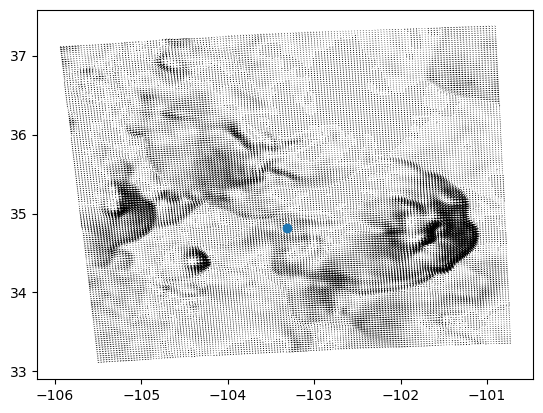

In [62]:
plot_wind_field(ds, IV)

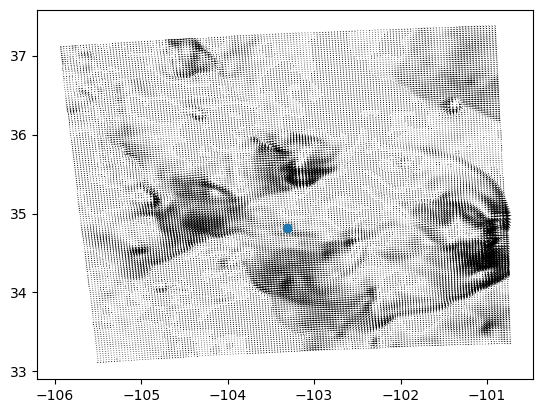

In [61]:
ds_6 = fetch_rrfs_forecast(IV, 7)
plot_wind_field(ds_6, IV)

In [137]:
IV

index                                                      12
Speed                                                      92
Location                                                GRADY
County                                                  CURRY
State                                                      NM
Lat                                                     34.82
Lon                                                   -103.31
Comments    TORUS MOBILE MESONET CLOCKED 92.4 MPH FROM RFD...
datetime                                  2023-05-24 01:13:00
Name: 800, dtype: object

In [76]:
#TODO: Figure out how to subset the data

#Inputs ds, lat lom
#Output ds bounded by 5x5 lat, lon centered on lat lon
def foo(lat, lon, model_output, w, h):
    #Get bounds for box centered on lat, lon
    #Subset xarray dataset to contain things inside the bound
    return

def get_bounding_box(lat, lon, w, h):
    lat_max = lat + h
    lat_min = lat - h
    lon_max = lon + w
    lon_min = lon - w
    return lat_max, lat_min, lon_max, lon_min

In [77]:
get_bounding_box(34, -103, 3, 3)

(37, 31, -100, -106)

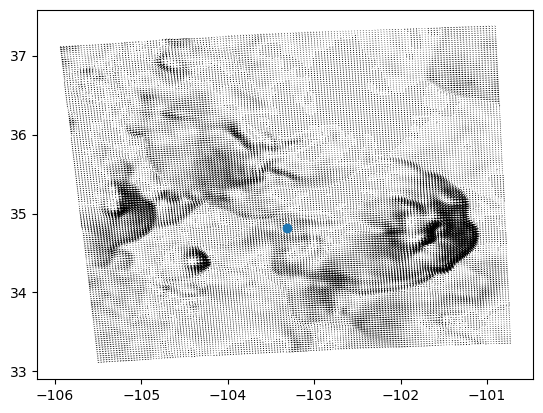

In [38]:
l = 650
y = 340
offset = 150

o = 150
X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.scatter(interesting_events.loc[800]["Lon"], interesting_events.loc[800]["Lat"])

plt.show()

In [91]:
# import matplotlib.pyplot as plt
# import numpy as np

# step = 5
# X = ds.coords['gridlon_0'][0:100:step, 0:100:step]
# Y = ds.coords['gridlat_0'][0:100:step, 0:100:step]
# U = ds.MAXUW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]
# V = ds.MAXVW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]

# normalized_U = (U - U.min())/(U.max() - U.min())
# normalized_V = (V - V.min())/(V.max() - V.min())
# fig, ax = plt.subplots()

# q = ax.quiver(X, Y, U, V)

# plt.show()

In [11]:
U - U.mean()

<xarray.DataArray 'MAXUW_P8_L103_GLC0_max1h' (ygrid_0: 20, xgrid_0: 20)>
array([[-1.4775    , -1.6025    , -1.415     , -1.415     , -1.165     ,
        -1.04      , -0.78999996, -0.78999996, -0.66499996, -0.91499996,
        -0.66499996, -0.60249996, -0.4775    , -0.3525    , -0.415     ,
        -0.415     ,  0.08500001, -0.10249999, -0.29      , -0.03999999],
       [-1.3525    , -1.2275    , -1.4775    , -1.04      , -0.53999996,
        -0.72749996, -0.53999996, -0.53999996, -0.72749996, -0.16499999,
        -0.78999996, -0.66499996, -0.60249996, -0.10249999, -0.3525    ,
        -0.66499996, -0.10249999, -0.16499999, -0.10249999,  0.02250001],
       [-1.4775    , -0.78999996, -1.04      , -0.415     , -0.72749996,
        -1.165     , -0.16499999, -0.10249999, -0.3525    ,  0.21000001,
        -0.10249999, -0.22749999, -0.22749999,  0.3975    ,  0.21000001,
         0.02250001, -0.10249999,  0.02250001, -0.16499999,  0.14750001],
       [-1.3525    , -0.60249996, -0.91499996, -1.1025    , -0.97749996,
        -1.165     , -0.415     , -0.53999996, -0.03999999, -0.4775    ,
         0.58500004,  0.08500001, -0.53999996,  0.52250004,  0.64750004,
        -0.97749996,  0.3975    ,  0.08500001,  0.46      ,  0.2725    ],
       [-0.97749996, -1.415     , -1.3525    , -1.1025    , -0.60249996,
        -0.85249996, -0.78999996, -0.53999996, -0.10249999, -0.85249996,
         0.2725    ,  0.46      ,  0.46      ,  0.52250004,  0.02250001,
         0.08500001, -0.53999996,  0.08500001,  0.14750001, -0.16499999],
...
         0.08500001, -0.10249999, -0.10249999, -0.29      ,  0.3975    ,
         0.52250004,  0.21000001,  0.14750001,  0.83500004,  1.085     ,
         0.52250004,  0.96000004,  1.21      ,  0.83500004,  0.52250004],
       [-0.10249999, -0.10249999, -0.29      , -0.03999999,  0.46      ,
         0.14750001, -0.22749999,  0.21000001,  0.46      ,  0.02250001,
         0.3975    ,  0.89750004,  0.46      ,  1.21      ,  0.58500004,
         0.335     ,  1.335     ,  0.52250004,  1.1475    ,  0.83500004],
       [-0.03999999,  0.08500001, -0.10249999,  0.64750004,  0.71000004,
         0.58500004,  0.08500001,  0.52250004,  0.71000004,  0.83500004,
         0.58500004,  0.89750004,  1.71      ,  1.2725    ,  0.58500004,
         0.58500004,  0.2725    ,  0.58500004,  0.21000001,  1.0225    ],
       [-0.97749996,  0.64750004,  0.08500001,  0.08500001,  0.08500001,
        -0.10249999,  0.335     ,  0.77250004,  0.71000004,  0.89750004,
         1.21      ,  1.085     ,  1.585     ,  1.2725    ,  1.085     ,
         0.71000004,  0.58500004,  0.83500004,  0.64750004,  1.0225    ],
       [-0.66499996, -0.16499999,  0.2725    ,  0.335     ,  0.52250004,
         0.3975    ,  0.46      ,  0.83500004,  1.1475    ,  0.46      ,
         0.89750004,  1.0225    ,  1.3975    ,  1.335     ,  1.21      ,
         1.21      ,  1.1475    ,  0.89750004,  1.1475    ,  1.1475    ]],
      dtype=float32)
Coordinates:
    gridlat_0  (ygrid_0, xgrid_0) float32 ...
    gridlon_0  (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0

In [8]:
#Subsetting the region 


In [123]:
def convert(lat, lon):
    for j in range()

In [119]:
v = [[0]*len(X[0])]*len(X)

for i in range(len(X)):
    for j in range(len(X[0])):
        v[i][j] = [X[i,j].values,Y[i,j].values]

In [122]:
len(v)

71

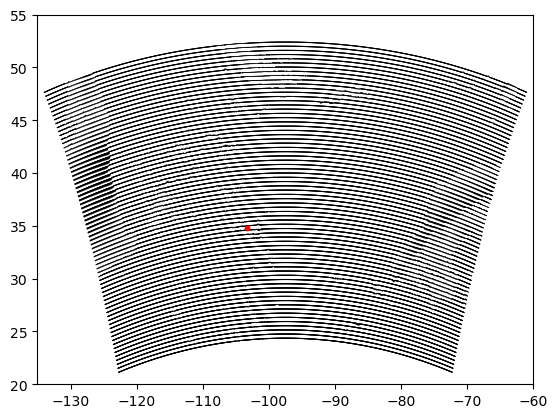

In [99]:

offset = 15

X = ds.coords['gridlon_0'][0::offset]
Y = ds.coords['gridlat_0'][0::offset]
U = ds.UGRD_P0_L103_GLC0[0::offset]
V = ds.VGRD_P0_L103_GLC0[0::offset]

fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)
plt.scatter(IV["Lon"], IV["Lat"], color="red", s=10)
plt.xlim(-135, -60)
plt.ylim(20,55)

plt.show()

In [85]:
# for i in ds.data_vars:
#     print(i,ds[i].attrs['long_name'])
#     print("")

In [28]:
def foo(ds, step, l, offset, y, o):
    X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
    Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
    U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
    V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]
    return X, Y, U, V

NameError: name 'o' is not defined

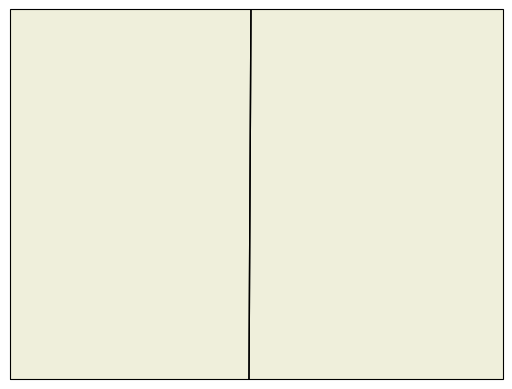

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-105, -101, 33, 36], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)

step = 12
l = 650
offset = 200
y = 340

X, Y, U, V = foo(ds, step, l, offset, y, o)

q = ax.quiver(X, Y, U, V, transform=ccrs.PlateCarree())
x = interesting_events["Lon"].to_numpy().astype("float")
y = interesting_events["Lat"].to_numpy().astype("float")

plt.scatter(x=-103.32, y=34.82, color="red", s=4)
plt.show()


## Metpy and plotting section ##

In [23]:
test_event = lon_filtered
test_event = test_event.loc[800]

ds = fetch_rrfs_forecast(IV, 6)
# ds.xgrid_0.values

File name rrfs.t19z.natlev.f006.conus_3km.grib2


In [305]:
ds.coords["gridlon_0"].shape

(1059, 1799)

In [24]:
def bounding_indexes(ds, IV):
    lat_grid, lon_grid = ds['gridlat_0'].values, ds['gridlon_0'].values
    lat, lon = IV["Lat"], IV["Lon"]
    distance = .75
    lat_size = len(lat_grid) #1059
    lon_size = len(lat_grid[0]) #1799
        
    lat_indexes, lon_indexes = [], []
    
    for lat_index in range(lat_size):
        for lon_index in range(lon_size):
            if abs(lat_grid[lat_index][lon_index] - lat) < distance and abs(lon_grid[lat_index][lon_index] - lon) < distance:
                lat_indexes.append(lat_index)
                lon_indexes.append(lon_index)

    min_lat_index, max_lat_index = min(lat_indexes), max(lat_indexes)
    min_lon_index, max_lon_index = min(lon_indexes), max(lon_indexes)
    return min_lat_index, max_lat_index, min_lon_index, max_lon_index
    
def get_coords(ds, lat_ind, lon_ind):
    return ds.coords["gridlat_0"][lat_ind, lon_ind].values, ds.coords["gridlon_0"][lat_ind, lon_ind].values

def get_latlons(min_lat, max_lat, min_lon, max_lon):
    lats = []
    lons = []
    for lat_index in range(min_lat, max_lat):
        for lon_index in range(min_lon, max_lon):
            lat, lon = get_coords(ds, lat_index, lon_index)
            lats.append(lat)
            lons.append(lon)
    return lats, lons

In [25]:
mla, Mla, mlo, Mlo = bounding_indexes(ds, test_event)
new_ds = ds.isel(ygrid_0=range(mla,Mla), xgrid_0=range(mlo,Mlo))
# lats, lons = get_latlons(mla, Mla, mlo, Mlo)
# plt.scatter(x=lons, y = lats, s = 4)
# plt.scatter(x=test_event["Lon"],y=test_event["Lat"])

In [26]:
def get_coords(ds, lat_ind, lon_ind):
    return ds.coords["gridlat_0"][lat_ind, lon_ind].values, ds.coords["gridlon_0"][lat_ind, lon_ind].values

In [27]:
# Wind Speed Calculation

import matplotlib.pyplot as plt
import metpy.calc as mpcalc

def plot_wind_speed(ds, interesting_events, center_event, offset=3):

    # Calculate the total deformation of the flow
    wind_speed = mpcalc.wind_speed(ds.UGRD_P0_L103_GLC0, ds.VGRD_P0_L103_GLC0)
    # start figure and set axis
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # plot wind speed
    cf = ax.contourf(ds.coords['gridlon_0'], 
                     ds.coords['gridlat_0'], 
                     wind_speed, cmap=plt.cm.BuPu)
    plt.colorbar(cf, pad=0, aspect=50)
    ax.barbs(ds.coords['gridlon_0'][0::offset, 0::offset],
             ds.coords['gridlat_0'][0::offset, 0::offset],
             ds.UGRD_P0_L103_GLC0[0::offset, 0::offset], 
             ds.VGRD_P0_L103_GLC0[0::offset, 0::offset], 
             color='black', length=5, alpha=0.5)
   
    ax.set_title('Wind Speed Calculation')
    
    plt.scatter(
            x = lon_filtered["Lon"],
            y = lon_filtered["Lat"],
            color="red",
            s=2,
            alpha=1
        )
    
    plt.scatter(
        x=center_event["Lon"],
        y=center_event["Lat"],
        color="Orange",
        s=5
    )
    plt.show()



In [28]:
def plot_interesting_events(center_event, interesting_events, forecast_hour):
    
    ds = fetch_rrfs_forecast(center_event, forecast_hour)
    
    mla, Mla, mlo, Mlo = bounding_indexes(ds, center_event)
    new_ds = ds.isel(ygrid_0=range(mla,Mla), xgrid_0=range(mlo,Mlo))
    plot_wind_speed(new_ds, interesting_events, center_event)

In [29]:
events = lon_filtered
IV

index                                                      12
Speed                                                      92
Location                                                GRADY
County                                                  CURRY
State                                                      NM
Lat                                                     34.82
Lon                                                   -103.31
Comments    TORUS MOBILE MESONET CLOCKED 92.4 MPH FROM RFD...
datetime                                  2023-05-24 01:13:00
Name: 800, dtype: object

File name rrfs.t19z.natlev.f003.conus_3km.grib2


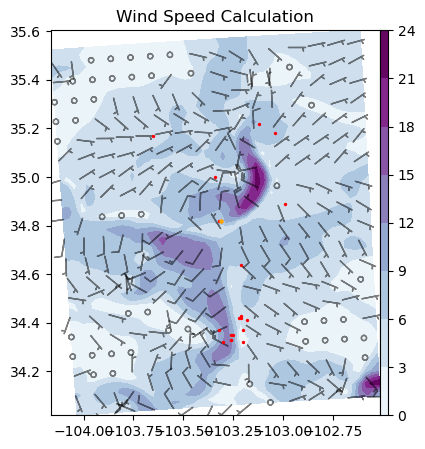

In [30]:
plot_interesting_events(IV, events, 3)

File name rrfs.t19z.natlev.f006.conus_3km.grib2


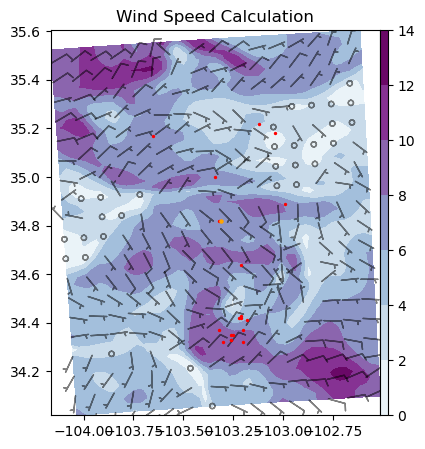

In [31]:
plot_interesting_events(IV, events, 6)

File name rrfs.t19z.natlev.f009.conus_3km.grib2


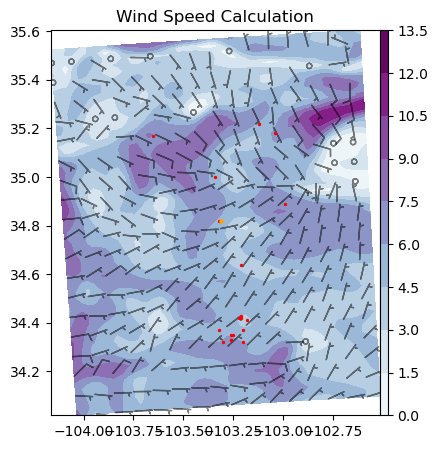

In [32]:
plot_interesting_events(IV, events, 9)

File name rrfs.t19z.natlev.f012.conus_3km.grib2
File succesfully downloaded


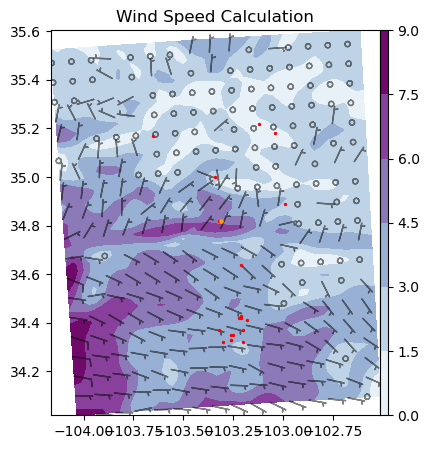

In [34]:
plot_interesting_events(IV, events, 12)

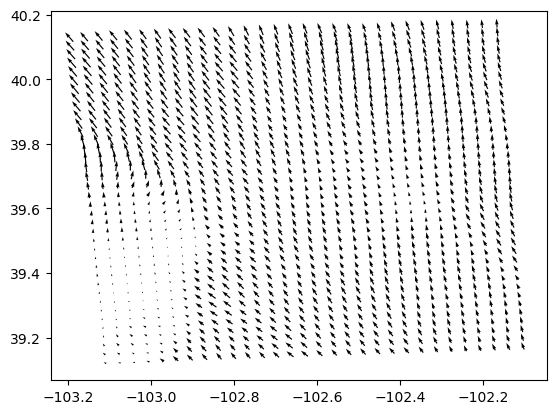

In [79]:

offset = 15ots using plt.subplots
i = 1
# e = 
j = 0
X = new_ds.coords['gridlon_0']
Y = new_ds.coords['gridlat_0']
U = new_ds.UGRD_P0_L103_GLC0
V = new_ds.VGRD_P0_L103_GLC0

fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)
# plt.scatter(IV["Lon"], IV["Lat"], color="red", s=10)
# plt.xlim(-135, -60)
# plt.ylim(20,55)

plt.show()

In [98]:
new_ds.coords["gridlon_0"][-1,0].values, new_ds.coords["gridlon_0"][0,-1].values

(array(-103.18726, dtype=float32), array(-102.10066, dtype=float32))

In [35]:
l = 3
a = str(l) if l >= 10 else f'0{l}'

In [36]:
a

'03'